# COMP 7810 Group project-- Group 6
### LI Wenshu (20440510), XU Shiqian (20442882), LIU Yangyang (20455356)

## Part one: dataset and goals

### Our group project is focus on some sales data from Tmall flagship store in year 2014-2017
### dataset is collected from：https://www.datafocus.ai/

### dataset details:
#### Source: this dataset is about sales and data source is from www.datafocus.ai and it's a real world dataset.
#### Field: belongs to the sales.
#### Attributes: Among all attributes we must choose the representative ones and do analysis on them.

### Goals and Tasks:
### Goals:
### To find attributes are effecting the sales or not and how much degree.
Categories of factors that can affect sales price:（all 13 attributes)
first in timeline(订单日期） analyze the whole sales situation. 订单日期 also can be analyzed in 3 aspects.
1.region:区域，目的省份，目的城市，快递公司
2.customer：顾客姓名,收款方式,区域
3.goods：产品名称，产品类别，产品子类别
销售数量，销售金额
### Conduct statistical analysis on the dataset and build models, then based on results do evulations and summary.
    
### Tasks:
#### 1.Import dataset
#### 2.Analyze on dataset
#### 3.Data preprocessing
#### 4.Exploratory Data Analysis
#### 5.Feature engineering
#### 6.Experiments and results
#### 7.Summary

## Part two: import data and python packages

In [1]:
# import related library to futher study
import numpy as np
import pandas as pd
#import matplotlib to do some visual display
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore displaying warnings
import warnings
warnings.filterwarnings("ignore")
#further import
import scipy.stats as stats
import seaborn as sns
import mlxtend
from pandas import read_csv, datetime, DataFrame
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#### we use the encoding='gbk' to load the original dataset into dataframe

In [3]:
#Read the data file in csv format into Dataframe, load the dataset
data = pd.read_csv('天猫旗舰店销售数据 .csv', encoding='gbk')
#preview the data
print("dataset preview:")
data

dataset preview:


,订单日期,产品名称,顾客姓名,订单单号,区域,目的省份,目的城市,快递公司,产品类别,产品子类别,销售数量,销售金额,收款方式
0,2017/3/2,肉松青豆120g,Lena Cacioppo,10021247876,华东,安徽省,蚌埠市,圆通,坚果炒货,特惠炒货,29,188.094,应收账款
1,2017/5/19,小米锅巴（麻辣味）90g,Alejandro Ballentine,10021247909,华南,广东省,佛山市,圆通,坚果炒货,特惠炒货,46,227.700,应收票据
2,2017/7/16,原生碧根果218g,Fred McMath,10021247974,华南,河南省,三门峡市,圆通,坚果炒货,果果仁仁,35,668.640,应收票据
3,2017/7/24,野山小核桃仁160g,Evan Minnotte,10021248082,华北,山西省,晋城市,圆通,坚果炒货,果果仁仁,48,2596.608,应收账款
4,2016/2/12,精装纸皮核桃380g,Olvera Toch,10021248111,华北,北京市,北京市,中通,坚果炒货,磕壳坚果,1,38.703,应收账款
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,2014/4/24,小米锅巴孜然味90g,Alejandro Ballentine,10022252218,华北,内蒙古,乌兰察布市,顺丰,坚果炒货,特惠炒货,48,232.800,应收账款
8690,2014/1/18,甘草西瓜子218g,Neil Knudson,10022252219,华东,安徽省,池州市,顺丰,坚果炒货,磕壳坚果,45,574.695,应收账款
8691,2015/5/26,良品山核桃椒盐味238g,Alejandro Grove,10022252220,华北,河北省,廊坊市,顺丰,坚果炒货,磕壳坚果,42,1118.502,应收账款
8692,2015/11/12,小米锅巴孜然味90g,Deborah Brumfield,10022252221,华北,北京市,北京市,顺丰,坚果炒货,特惠炒货,46,211.600,应收账款


## Part three: data check, value assessment, data preprocessing

In [4]:
#first look at the data shape(size)
data.shape

(8694, 13)

In [5]:
#look at the data type of each column
data.dtypes

订单日期      object
产品名称      object
顾客姓名      object
订单单号       int64
区域        object
目的省份      object
目的城市      object
快递公司      object
产品类别      object
产品子类别     object
销售数量       int64
销售金额     float64
收款方式      object
dtype: object

#### we can easily see our 13 attributes are mostly object and only sales attribute are numerical ones.

In [6]:
# check if any missing value in the dataframe
data.isnull().values.any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8694 entries, 0 to 8693
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单日期    8694 non-null   object 
 1   产品名称    8694 non-null   object 
 2   顾客姓名    8694 non-null   object 
 3   订单单号    8694 non-null   int64  
 4   区域      8694 non-null   object 
 5   目的省份    8694 non-null   object 
 6   目的城市    8694 non-null   object 
 7   快递公司    8694 non-null   object 
 8   产品类别    8694 non-null   object 
 9   产品子类别   8694 non-null   object 
 10  销售数量    8694 non-null   int64  
 11  销售金额    8694 non-null   float64
 12  收款方式    8694 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 883.1+ KB


#### so this dataset does not have any missing value so we do not need to handle.

In [8]:
#Basic descriptive information of the data and check outliers.
data.describe()

,订单单号,销售数量,销售金额
count,8.694000e+03,8694.000000,8694.000000
mean,1.002184e+10,27.687716,462.819765
std,4.241441e+05,14.775256,489.481543
min,1.002125e+10,1.000000,2.325000
25%,1.002141e+10,15.000000,139.207500
50%,1.002202e+10,28.000000,282.900000
75%,1.002225e+10,40.000000,592.515000
max,1.002225e+10,55.000000,3079.944000


#### Basic statistical description information, see basically no outliers.

In [9]:
# check if exist duplicated value
data.duplicated().sum()> 0

True

#### This dataset have no missing, duplicated and outliers so we do not need to do any processing on it.

## Part Four: Exploratory Data Analysis

In [10]:
#Data format conversion
#Since "订单日期" will be used in further analysis later, but we see "订单日期" now is "object" format so we have 
#to do data cleanning on it and transform its format.

In [11]:
#for "订单日期" attribute so format conversion
data.loc[:,'订单日期']=pd.to_datetime(data.loc[:,'订单日期'],format='%Y/%m/%d',errors='ignore')

In [12]:
# Sort, sort data in ascending order by “订单日期"
#Sort data_new by "订单日期"
data_new=data.sort_values(by='订单日期',ascending=True,na_position='first')

In [13]:
# Intercept the year and month fields
from datetime import datetime
dt=data_new['订单日期'].astype(str)
dt=dt.apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
data_new['month']=dt.map(lambda x:x.month)
data_new['year']=dt.map(lambda x:x.year)
data_new['day']=dt.map(lambda x:x.day)

In [14]:
# add "销售单价“ attribute
data_new['销售单价']=data_new['销售金额']/data_new['销售数量']

In [15]:
# now we can build a sales_data datset with some certain attributes
sales_data=data_new[['订单日期','销售数量','销售金额','销售单价','year','month','day']]
sales_data.head()

,订单日期,销售数量,销售金额,销售单价,year,month,day
4920,2014-01-01,37,164.983,4.459,2014,1,1
6022,2014-01-01,23,110.400,4.800,2014,1,1
7407,2014-01-02,9,152.100,16.900,2014,1,2
7964,2014-01-02,6,222.642,37.107,2014,1,2
7325,2014-01-02,13,96.525,7.425,2014,1,2


<AxesSubplot:title={'center':'The distribution of price'}, ylabel='Frequency'>

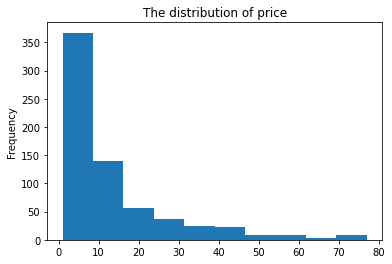

In [16]:
# now gain some graphical insight
# Visualizing the distribution of the variables
# plot some variable  
data_new['销售单价'].value_counts().plot(kind='hist', 
                              title='The distribution of price',
                              figsize=(6, 4))

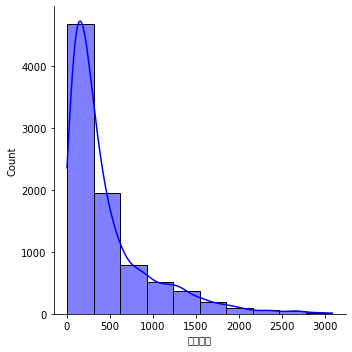

In [17]:
#the distrbution of sales
sns.displot(data_new['销售金额'], color="b",bins=10, kde=True)

In [18]:
stats.kstest(data_new['销售金额'], 'norm')

KstestResult(statistic=0.9997666842128863, pvalue=0.0)

In [19]:
# since our dataset attribute's valua are Chinese and we need to do something to successfully let matplotlib work
from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

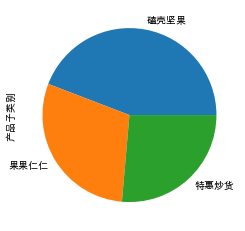

In [21]:
# since 产品类别 are all 坚果炒货
data_new['产品子类别'].value_counts().plot(kind='pie')
plt.show()

array([[<AxesSubplot:title={'center':'(2014, 东北)'}>,
        <AxesSubplot:title={'center':'(2014, 华东)'}>,
        <AxesSubplot:title={'center':'(2014, 华北)'}>,
        <AxesSubplot:title={'center':'(2014, 华南)'}>,
        <AxesSubplot:title={'center':'(2014, 西北)'}>],
       [<AxesSubplot:title={'center':'(2014, 西南)'}>,
        <AxesSubplot:title={'center':'(2015, 东北)'}>,
        <AxesSubplot:title={'center':'(2015, 华东)'}>,
        <AxesSubplot:title={'center':'(2015, 华北)'}>,
        <AxesSubplot:title={'center':'(2015, 华南)'}>],
       [<AxesSubplot:title={'center':'(2015, 西北)'}>,
        <AxesSubplot:title={'center':'(2015, 西南)'}>,
        <AxesSubplot:title={'center':'(2016, 东北)'}>,
        <AxesSubplot:title={'center':'(2016, 华东)'}>,
        <AxesSubplot:title={'center':'(2016, 华北)'}>],
       [<AxesSubplot:title={'center':'(2016, 华南)'}>,
        <AxesSubplot:title={'center':'(2016, 西北)'}>,
        <AxesSubplot:title={'center':'(2016, 西南)'}>,
        <AxesSubplot:title={'center':'(2017

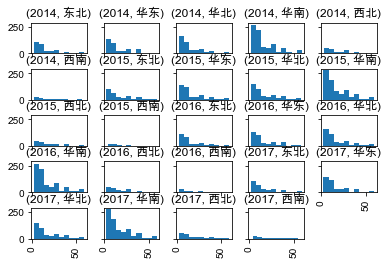

In [22]:
# now for time, we gain some insights
# Plot the 销售单价 distribution of different groups year and 区域)
data_new.hist(column='销售单价', by=['year','区域'], sharex=True, sharey=True, bins=10)

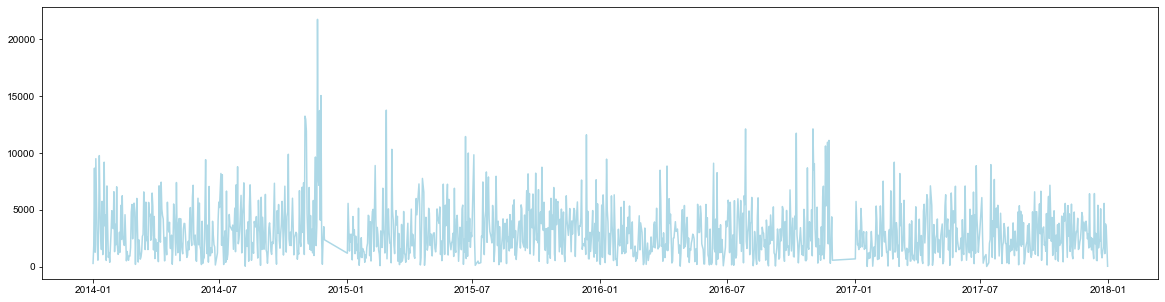

In [23]:
data_new_average_sales_year = data_new.groupby(by=['订单日期'], as_index=False)['销售金额'].sum()
data_new_average_sales = data_new_average_sales_year.sort_values('销售金额', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(data_new_average_sales_year.订单日期, data_new_average_sales_year.销售金额,color = 'lightblue')
plt.show()

#### after some insights about certain attributes now we do data analysis on 
#### three dimensions: customer,region,goods

#### 1.whole sales situations

In [24]:
# 1.1 analyze this 4 year 销售金额，销售数量，销售单价

<AxesSubplot:xlabel='year'>

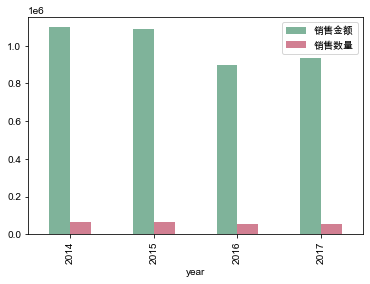

In [25]:
data_sale=data_new.groupby('year').sum()[['销售金额','销售数量']]
data_sale

#可视化展现
data_sale.plot(kind='bar',colormap = 'RdYlGn_r',alpha=0.5)

In [26]:
#Through the above calculation results and the chart display, we can find that the annual performance 
# of the supermarket from 2014 to 2017 shows an unstable trend, and the sales, sales volume are all floating. 
# The sales volume has above 800,000 from 2014 to 2017, indicating Operations are gradually stabilizing. 
# However, there is still a certain gap in sales compared to large supermarkets so they can continue to work hard.

In [27]:
# caculate Year-on-year growth rate
rate=data_sale.pct_change()
rate

,销售金额,销售数量
year,,
2014,NaN,NaN
2015,-0.009445,-0.047702
2016,-0.172273,-0.131714
2017,0.039592,-0.011925


In [28]:
# from the above result, we easily see that sales amount and number are all decreasing.
# maybe the nut lover decrease or users prefer other platforms to buy nuts.
# so In addition, combined with annual sales, sales and other indicators, combined with the
# company's overall strategic planning, it is possible to predict or formulate the next year's total sales
#performance indicators.

In [29]:
#### 1.2 every year,month sales situations

<AxesSubplot:title={'center':'销售数量'}, xlabel='month'>

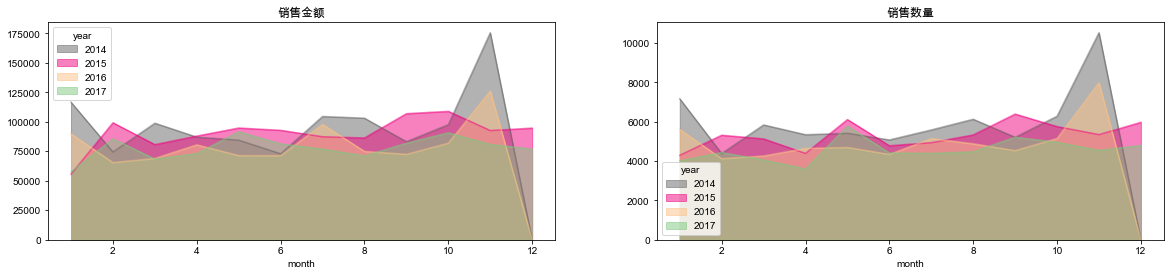

In [30]:
# every month 销售额/销量
data_sale_month=pd.pivot_table(data_new,index='month',columns='year',values=['销售数量','销售金额',],aggfunc='sum')
data_sale_month

#每月销售额/销量堆叠图
fig,axes = plt.subplots(1,2,figsize = (20,4))
data_sale_month['销售金额'].plot.area(colormap = 'Accent_r',stacked=False,ax=axes[0],title='销售金额')
data_sale_month['销售数量'].plot.area(colormap = 'Accent_r',stacked=False,ax=axes[1],title='销售数量')

In [31]:
#From the above table and chart, it can be roughly seen that the supermarket's sales seasonality is still different.
#The end of the year and the beginning of the year are the peak season for nuts.

#For peak season months, strategies such as operation promotion should be maintained, 
# and investment can be increased to increase overall sales.
# For the off-season months, new product development can be combined with product characteristics, 
# and some promotional activities can be held to attract customers.

In [32]:
# caculate growth rate
data_sale_month['销售金额'].pct_change(axis='columns').style.background_gradient(cmap='Greens',axis =1,low=0,high=1)

year,2014,2015,2016,2017
month,,,,
1,nan,-0.523504,0.615572,-0.357441
2,nan,0.333380,-0.340761,0.308517
3,nan,-0.183486,-0.145452,-0.007522
4,nan,0.010385,-0.084685,-0.091534
5,nan,0.122263,-0.247225,0.283240
6,nan,0.273061,-0.231917,0.141584
7,nan,-0.164309,0.119666,-0.214007
8,nan,-0.162433,-0.132059,-0.050939
9,nan,0.285662,-0.322765,0.130522


see from the table, the rate sometimes decrease and sometimes increase so
the nut sales condition really unstable.

#### 2.region sales situations

In [33]:
# in this analysis, 区域，目的省份，目的城市 ，快递公司 four attributes were chosen.

In [34]:
# 2.1 only foucus on "区域“
data_new["区域"].value_counts()
# we can see the whole China region has been splited into 6 regions.

华南    3210
华北    1716
华东    1584
东北    1208
西北     680
西南     296
Name: 区域, dtype: int64

<AxesSubplot:title={'center':'Mean 销售金额 in each 区域'}, ylabel='区域'>

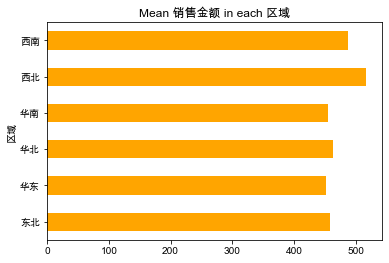

In [35]:
# plot the average of 销售金额 of each region

data_new.groupby('区域')['销售金额'].mean().plot(kind='barh', 
                                        title='Mean 销售金额 in each 区域', 
                                        color='orange',
                                        figsize=(6, 4)) 

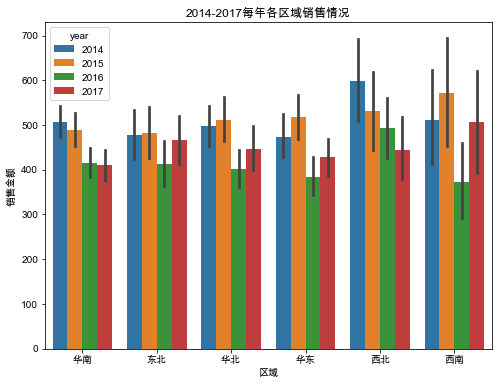

In [36]:
# with time we can also plot
plt.figure(figsize=(8,6))
sns.barplot(data=data_new, x='区域', y='销售金额', hue='year')
plt.title('2014-2017每年各区域销售情况')
plt.show()

In [37]:
# caculate thr total 销售金额 in 4 regions
region_Sales = data_new.groupby(['区域']).agg({'销售金额':'sum'})
region_Sales['percent'] = region_Sales['销售金额'] / data_new['销售金额'].sum()
region_Sales.sort_values('percent',inplace=True,ascending=False)
region_Sales.style.background_gradient()

,销售金额,percent
区域,,
华南,1461323.127000,0.363174
华北,795805.810000,0.197777
华东,716048.861000,0.177955
东北,554671.783000,0.137849
西北,351580.261000,0.087376
西南,144325.198000,0.035868


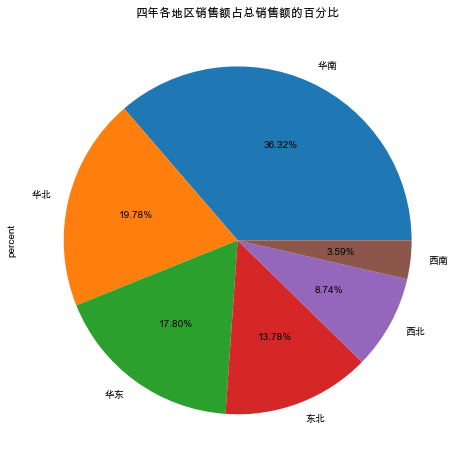

In [38]:
region_Sales['percent'].plot.pie(autopct='%.2f%%', figsize=(8,8))
plt.title('四年各地区销售额占总销售额的百分比')
plt.show()

In [39]:
# we see that different regions, price are really close to each other. 

In [40]:
# 2.2 more details about region analysis

In [41]:
# Nummber of non-null unique 目的城市 values
data_new['目的城市'].nunique()

247

In [42]:
data_new["目的省份"].value_counts()

广东省    1324
广西省     794
浙江省     662
辽宁省     582
内蒙古     488
海南省     398
山西省     392
吉林省     358
甘肃省     350
北京市     336
河南省     328
安徽省     322
天津市     298
黑龙江     268
河北省     202
湖北省     200
山东省     178
湖南省     166
陕西省     140
福建省     116
上海市     114
江苏省     112
四川省     106
宁夏       98
江西省      80
贵州省      72
新疆       72
重庆市      68
西藏       30
云南省      20
青海省      20
Name: 目的省份, dtype: int64

we can easily see that “目的省份“，”目的城市“ have too many values
so we will analyze it with another dimension "产品子类别"
first use hot-encoding to transform the "产品子类别" to "numerical" values
#bulid 产品子类别 group
def good(x):
    if x =='特惠炒货':
        return 0
    elif x=="果果仁仁":
        return 1
    else:
        return 2
data_new['产品子类别'] = data_new['产品子类别'].apply(good)

In [43]:
data_new["产品子类别"]

4920    磕壳坚果
6022    磕壳坚果
7407    磕壳坚果
7964    磕壳坚果
7325    磕壳坚果
        ... 
3341    磕壳坚果
2593    果果仁仁
138     特惠炒货
1002    果果仁仁
2785    磕壳坚果
Name: 产品子类别, Length: 8694, dtype: object

array([[<AxesSubplot:title={'center':'上海市'}>,
        <AxesSubplot:title={'center':'云南省'}>,
        <AxesSubplot:title={'center':'内蒙古'}>,
        <AxesSubplot:title={'center':'北京市'}>,
        <AxesSubplot:title={'center':'吉林省'}>,
        <AxesSubplot:title={'center':'四川省'}>],
       [<AxesSubplot:title={'center':'天津市'}>,
        <AxesSubplot:title={'center':'宁夏'}>,
        <AxesSubplot:title={'center':'安徽省'}>,
        <AxesSubplot:title={'center':'山东省'}>,
        <AxesSubplot:title={'center':'山西省'}>,
        <AxesSubplot:title={'center':'广东省'}>],
       [<AxesSubplot:title={'center':'广西省'}>,
        <AxesSubplot:title={'center':'新疆'}>,
        <AxesSubplot:title={'center':'江苏省'}>,
        <AxesSubplot:title={'center':'江西省'}>,
        <AxesSubplot:title={'center':'河北省'}>,
        <AxesSubplot:title={'center':'河南省'}>],
       [<AxesSubplot:title={'center':'浙江省'}>,
        <AxesSubplot:title={'center':'海南省'}>,
        <AxesSubplot:title={'center':'湖北省'}>,
        <AxesSubplot:title={'cent

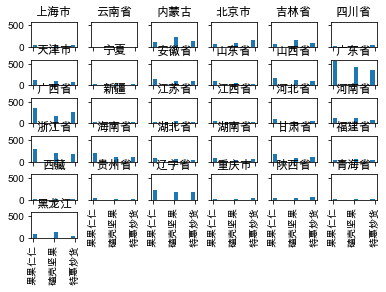

In [44]:
# Plot the 产品子类别 distribution of different 目的省份
data_new.hist(column='产品子类别', by=['目的省份'], sharex=True, sharey=True, bins=10)

In [45]:
# as for 目的城市， its value is too much and if we group it into small groups 
# then we will get 目的省份 or even 区域 value, that's duplicated tasks

In [46]:
# as for 快递公司， we combine it with 区域  to tell 快递公司's prefrence in different region

Hypothesis Testing 1

Null Hypothesis: There is no relationship between 快递公司 preference and the region of the customer.

Alternate Hypothesis: There is a relationship between 快递公司 preference and the of region of the customer

significance level, α to be 0.05.

In [47]:
# data count: express and region
observed = data_new.pivot_table('订单单号', ['区域'], '快递公司', aggfunc='count').reset_index()
observed = observed.set_index('区域')
observed

快递公司,EMS,中通,圆通,申通,韵达,顺丰
区域,,,,,,
东北,24,118,292,114,114,546
华东,20,120,424,214,124,682
华北,42,136,434,232,156,716
华南,38,236,924,368,272,1372
西北,24,46,178,90,70,272
西南,10,22,66,24,26,148


we can easily see that among all the express companies, "顺丰" is the most popular no matter in what region

In [48]:
# Implement hypothesis verification and calculate p value
chi1, p1, dof, expected = stats.chi2_contingency(observed)
print(chi1)
print(p1)

77.93869128094447
2.392214649787065e-07


#### Conclusion: We get a p1 value that is less than the confidence level that we specified before,
#### so we can reject the null hypothesis, and the conclusion is that there is a relationship
#### between express preference and the region of customer.

#### 3.customer sales situations

In [49]:
# as for customer aspect,顾客姓名,收款方式,区域 are related.

In [50]:
# first we see how many different customers buy nuts through Tianmao these years
data_new["顾客姓名"].value_counts()

Carlos Soltero      46
Adam Hart           46
Brad Thomas         44
Mark Cousins        42
Giulietta Dortch    40
                    ..
Justin Deggeller     2
Shahid Hopkins       2
Bruce Money          2
Maria Etezadi        2
Craig Rider          2
Name: 顾客姓名, Length: 764, dtype: int64

we have 764 customers in total and the least buy time is 2 and the most buy time is 46.

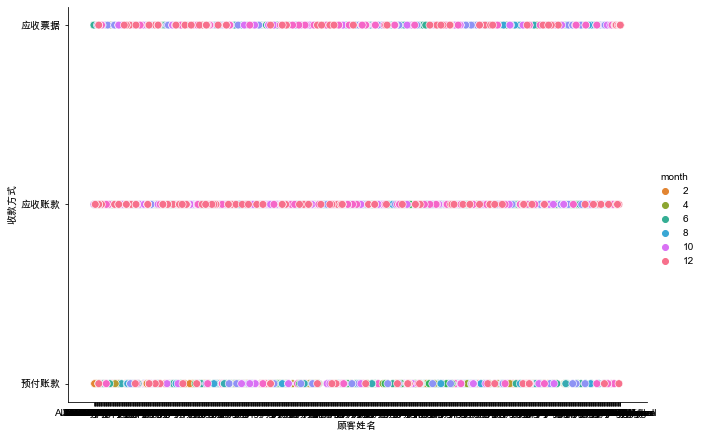

In [51]:
# we analyze different customer will chose which payment method
sns.relplot(x="顾客姓名", y="收款方式", data=data_new,
            kind='scatter', 
            hue='month', 
            palette='husl',s=60, # 设置调色盘类型和散点大小
            aspect=1.5,height=6  # 设置图像大小和横纵比
           )

to be honest, the last plot x label contains too many customers so the Rendering effect
may not well, but we still can see same customer often use the same payment

In [52]:
# with too many customers, we cannot analyze them together, so we chose certain customer to analyze
# maybe named "user profile"

we select the users who buy the most nuts these years “Carlos Soltero” and “Adam Hart”.   
we want compare their sales amount are same or not.

In [53]:
a=data_new[data_new['顾客姓名'] == 'Carlos Soltero']
data_new1=a["销售金额"].sum()
data_new1

13579.675000000003

In [54]:
b=data_new[data_new['顾客姓名'] == 'Adam Hart']
data_new2=b["销售金额"].sum()
data_new2

25301.438

we can see from the last two result, although they but the same time nuts,
but use different money because of different goods.

In [55]:
# now do customer order behavior analysis

In [56]:
# Intercept Customer_name, Order_Date, Quantity, Sales, Month as a new subset, 
# and sort Order_Date to facilitate subsequent analysis:

In [57]:
grouped_Customer = data_new[['顾客姓名','订单日期', 
                       '销售数量', '销售金额', 'month']].sort_values(['订单日期']).groupby('顾客姓名')

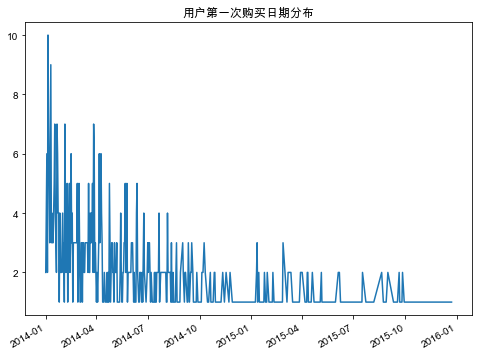

In [58]:
#Distribution of users' first purchase dates
grouped_Customer.min()['订单日期'].value_counts().plot(figsize=(8,6))
plt.title('用户第一次购买日期分布')
plt.show()

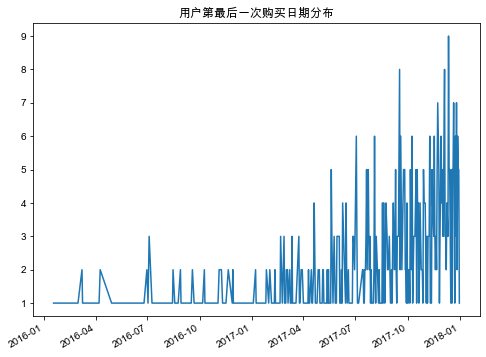

In [59]:
grouped_Customer.max().订单日期.value_counts().plot(figsize=(8,6))
plt.title('用户第最后一次购买日期分布')
plt.show()

It can be seen from the above that the new user growth trend is slow after the beginning of the 15th year, 
and businesses can absorb more new users through advertising and other promotion strategies.
Generally speaking, the number of new customers is decreasing year by year, 
which shows that the company maintains good old customers, but the acquisition rate of new customers is low. 
If a breakthrough can be made in acquiring new customers, it will bring a lot of room for growth.

In [60]:
# Next, let’s take a look at the number of customers who have only purchased once:
# Count the first purchase and last purchase date of each customer
Customer_life = grouped_Customer['订单日期'].agg(['min','max'])
# View the number of customers who have only one purchase record. 
# If the first and last purchase dates are the same, it means that there is only one purchase
(Customer_life['min']==Customer_life['max']).value_counts()

False    764
dtype: int64

From the results, there is no user who only consumes once, most users will buy multiple times, indicating that the repurchase rate is very high, and it also verifies the above conclusion that the company has a good maintenance of old customers.

Customer RFM模型分析
R (Recency): The interval between the client's most recent transaction. 
The larger the R value, the longer the date the customer transaction occurred, and vice versa,
the closer the date the customer transaction occurred.
F (Frequency): The number of transactions by the customer in the most recent period of time. 
The larger the F value, the more frequent customer transactions, and vice versa, 
the less active customer transactions.
M (Monetary): The amount of transactions made by the customer in the most recent period of time. 
The greater the value of M, the higher the customer value, and vice versa, the lower the customer value.

In [61]:
# first build RFM table

In [62]:
data_new.head()

,订单日期,产品名称,顾客姓名,订单单号,区域,目的省份,目的城市,快递公司,产品类别,产品子类别,销售数量,销售金额,收款方式,month,year,day,销售单价
4920,2014-01-01,甘草西瓜子90g,Jessica Myrick,10022248449,华南,河南省,濮阳市,顺丰,坚果炒货,磕壳坚果,37,164.983,应收票据,1,2014,1,4.459
6022,2014-01-01,黑珍珠葵瓜子110g,Matt Collister,10022249551,华南,湖南省,长沙市,申通,坚果炒货,磕壳坚果,23,110.400,应收票据,1,2014,1,4.800
7407,2014-01-02,瓜蒌子奶香味150g,Maris LaWare,10022250936,华南,广东省,清远市,顺丰,坚果炒货,磕壳坚果,9,152.100,应收票据,1,2014,2,16.900
7964,2014-01-02,精装纸皮核桃380g,Shaun Chance,10022251493,华南,广东省,清远市,顺丰,坚果炒货,磕壳坚果,6,222.642,应收票据,1,2014,2,37.107
7325,2014-01-02,奶香味四粒红花生180g,Alan Schoenberger,10022250854,华南,广东省,梅州市,顺丰,坚果炒货,磕壳坚果,13,96.525,应收票据,1,2014,2,7.425


In [63]:
rfm = data_new.pivot_table(index='顾客姓名', 
                     values = ['订单单号','销售金额','订单日期'], 
                     aggfunc={'订单单号':'count','销售金额':'sum','订单日期':'max'})

# Take the largest transaction date among all users as the standard, 
# and find the time interval of each transaction as R.
rfm['R'] = (rfm.订单日期.max()-rfm.订单日期) / np.timedelta64(1,'D')

# The number of orders for each customer is F, and the total sales is M.
rfm.rename(columns={'订单单号':'F','销售金额':'M'},inplace = True)
rfm = rfm[['R','F','M']]
rfm.head(6)

,R,F,M
顾客姓名,,,
Aaron Bergman,52.0,10,5516.790
Aaron Hawkins,83.0,22,16954.784
Aaron Smayling,27.0,30,13807.693
Adam Bellavance,105.0,16,6366.545
Adam Hart,50.0,46,25301.438
Adam Shillingsburg,86.0,26,11145.795


In [64]:
# Now mark the customer value and divide the customer into 8 levels (2x2x2):
# Based on the average value for comparison, if it exceeds the average value, it is 1, otherwise it is 0.
def rfm_func(x):
    level = x.apply(lambda x: '1' if x>0 else '0')
    level = level.R + level.F + level.M
    d = {"111": "重要价值客户",
        "011": "重要保持客户",
        "101": "重要挽留客户",
        "001": "重要发展客户",
        "110": "一般价值客户",
        "010": "一般保持客户",
        "100": "一般挽留客户",
        "000": "一般发展客户"}
    return d[level]

rfm['Label'] = rfm.apply(lambda x: x-x.mean()).apply(rfm_func, axis=1)
rfm.head(6)

,R,F,M,Label
顾客姓名,,,,
Aaron Bergman,52.0,10,5516.790,重要发展客户
Aaron Hawkins,83.0,22,16954.784,重要保持客户
Aaron Smayling,27.0,30,13807.693,重要保持客户
Adam Bellavance,105.0,16,6366.545,重要保持客户
Adam Hart,50.0,46,25301.438,重要保持客户
Adam Shillingsburg,86.0,26,11145.795,重要保持客户


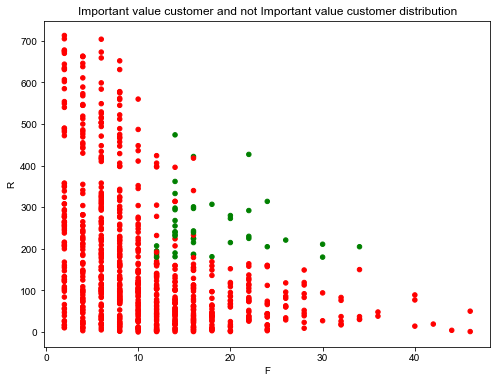

In [65]:
# Visual display
rfm.loc[rfm.Label=='重要价值客户','Color']='g'
rfm.loc[rfm.Label!='重要价值客户','Color']='r'
rfm.plot.scatter('F', 'R',c=rfm.Color, figsize=(8,6))
plt.title('Important value customer and not Important value customer distribution')
plt.show()

Different customer groups can be identified through RFM, personalized communication and marketing services can be developed for their user portraits, and their favorite products can be recommended in the future to provide strong support for more marketing decisions and create greater benefits for the company.

In [66]:
# Analysis of users and repurchase rate.

In [67]:
# Count the number of purchases made by each user each month.
pivoted_counts = data_new.pivot_table(index='顾客姓名', 
                               columns=['year','month'], 
                               values='订单日期', 
                               aggfunc='count').fillna(0)

# Set all the items greater than once to 1, otherwise set to 0
data_new_purchase = pivoted_counts.applymap(lambda x: 1 if x>0 else 0)
data_new_purchase.head(6)

year               2014                             ... 2017                 \
month                1  2  3  4  5  6  7  8  9  10  ...   3  4  5  6  7  8    
顾客姓名                                                ...                       
Aaron Bergman         0  0  0  0  0  0  1  0  0  0  ...    0  0  0  0  1  0   
Aaron Hawkins         0  0  0  0  1  0  0  1  0  1  ...    0  0  1  0  0  0   
Aaron Smayling        1  0  1  1  1  1  0  0  1  1  ...    0  0  1  0  0  0   
Adam Bellavance       0  0  0  0  0  0  0  0  0  1  ...    0  1  1  0  0  0   
Adam Hart             1  1  0  0  0  1  1  0  0  0  ...    1  0  0  0  0  0   
Adam Shillingsburg    1  1  1  0  0  1  1  0  1  0  ...    0  0  0  0  1  0   

year                            
month              9  10 11 12  
顾客姓名                            
Aaron Bergman       0  0  1  0  
Aaron Hawkins       1  1  0  0  
Aaron Smayling      0  0  1  1  
Adam Bellavance     1  0  0  0  
Adam Hart           1  0  1  0  
Adam Shillingsburg  1  1  0  0  

[6 rows x 46 columns]

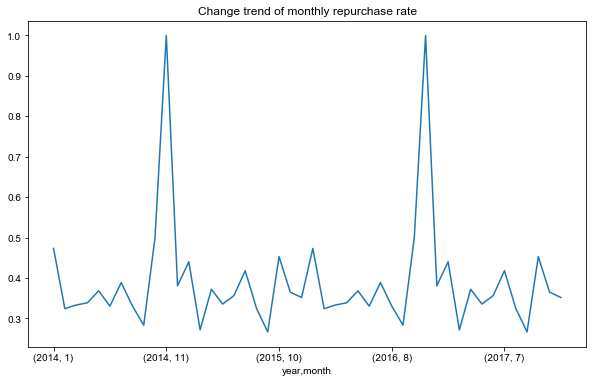

In [68]:
#Repurchase rate calculation indicator: 
# users who have purchased more than once in this month are counted as repurchase.
purchase_r = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
(purchase_r.sum()/purchase_r.count()).plot(figsize=(10,6))
plt.title('Change trend of monthly repurchase rate')
plt.show()

we can see from the above, it can be found that although the overall repurchase rate is not very high, it is very good in some months. The repurchase rate peaks in the middle of the year and the end of the year, which may be related to merchant discount activities or festivals. Therefore, merchants can make appropriate adjustments to make the repurchase rate higher.

#### 4.goods sales situations

In [69]:
# goods related attributes: 产品名称，产品类别，产品子类别.
# as we can see 产品类别 are all 坚果炒货, it's one kind of goods, so this attribute is not in our consideration.

In [70]:
# with 销售数量 and 销售金额 we combine 产品名称 and 产品子类别 do some analysis.
# First, count the top 1 产品子类别 in 销售数量:
产品子类别_count = data_new.groupby('产品子类别').count()['顾客姓名'].sort_values(ascending=False)
产品子类别_count.head(3)

产品子类别
磕壳坚果    3840
果果仁仁    2560
特惠炒货    2294
Name: 顾客姓名, dtype: int64

In [71]:
#磕壳坚果 is the most popular goods preferred by people.

In [72]:
# then on detailed 产品名称, count the top 8 in 销售数量:
产品名称_count = data_new.groupby('产品名称').count()['顾客姓名'].sort_values(ascending=False)
产品名称_count.head(8)

产品名称
东北红松330g        338
精装纸皮核桃380g      330
炭烧腰果120g        320
奶香巴旦木238g       194
夏威夷果盐焗味200g     192
西瓜子奶油味218g      184
碧根果椒盐味190g*3    176
盐焗扁核仁210g       174
Name: 顾客姓名, dtype: int64

In [73]:
# The top 8 products in terms of 销售金额:
产品名称_amount = data_new.groupby('产品名称').sum()['销售金额'].sort_values(ascending=False)
产品名称_amount.head(8)

产品名称
精装纸皮核桃380g      360484.929
东北红松330g        340120.767
碧根果椒盐味190g*3    267516.030
自然开心果210g       215032.573
野山小核桃仁160g      200889.024
奶香巴旦木238g       162070.006
盐焗扁核仁210g       132757.495
奶香夏威夷果280g      128236.316
Name: 销售金额, dtype: float64

From the above results, it can be seen that most of the top sales and the top sales are the same; you can focus on increasing the sales of this part of the product to increase the overall profit.

In [74]:
# Then look at the sales of specific product categories:

In [75]:
# Group by category and sub-category, and count sales and profits.
data_new_产品类别_产品子类别 = data_new.groupby(['产品类别','产品子类别']).sum()[['销售数量','销售金额']]
# Sort by sales in reverse order.
data_new_产品类别_产品子类别.sort_values('销售金额', ascending=False, inplace=True)
# Calculate the cumulative sales of each category of goods.
data_new_产品类别_产品子类别['cum_percent'] = data_new_产品类别_产品子类别['销售金额'].cumsum() / data_new_产品类别_产品子类别['销售金额'].sum()
data_new_产品类别_产品子类别.reset_index()

,产品类别,产品子类别,销售数量,销售金额,cum_percent
0,坚果炒货,磕壳坚果,106252,2459656.144,0.611284
1,坚果炒货,果果仁仁,70963,1124079.547,0.890645
2,坚果炒货,特惠炒货,63502,440019.349,1.000000


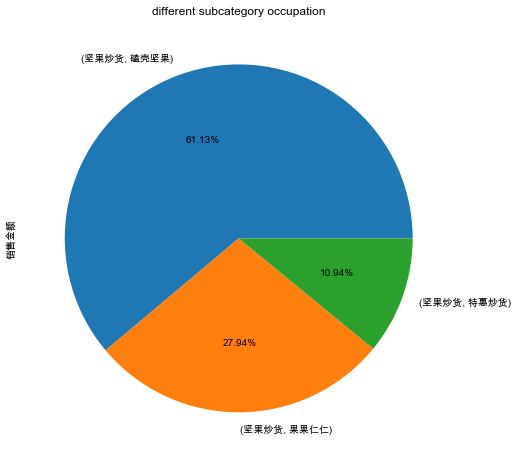

In [76]:
data_new_产品类别_产品子类别['销售金额'].plot(kind='pie', autopct='%.2f%%', figsize=(8,8))
plt.title('different subcategory occupation')
plt.show()

From the above chart, you can clearly see the comparison of the sales contribution of different types of goods. Knocked nuts are the most contributory. After that, merchants can invest more in this. It is the main product of its own advantage and should continue to be maintained in the subsequent business process. It can appropriately increase investment in combination with overall strategic development and gradually form its own brand. Then it is necessary to analyze the actual business and appropriately improve the business strategy.

## Part five: feature engineering

In [77]:
# Scaling the Dataset
from sklearn.preprocessing import StandardScaler
nayasc = StandardScaler()

Actually we have already do some feature engineering in last steps.
we get year,month,day,销售单价 new columns.

In [78]:
#now we have these columns
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8694 entries, 4920 to 2785
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单日期    8694 non-null   datetime64[ns]
 1   产品名称    8694 non-null   object        
 2   顾客姓名    8694 non-null   object        
 3   订单单号    8694 non-null   int64         
 4   区域      8694 non-null   object        
 5   目的省份    8694 non-null   object        
 6   目的城市    8694 non-null   object        
 7   快递公司    8694 non-null   object        
 8   产品类别    8694 non-null   object        
 9   产品子类别   8694 non-null   object        
 10  销售数量    8694 non-null   int64         
 11  销售金额    8694 non-null   float64       
 12  收款方式    8694 non-null   object        
 13  month   8694 non-null   int64         
 14  year    8694 non-null   int64         
 15  day     8694 non-null   int64         
 16  销售单价    8694 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), objec

In [79]:
# as we see all产品类别==坚果炒货,so we will drop it.
data_new = data_new.drop('产品类别', axis = 1)   #axis = 1 for columns 

In [80]:
# similarily,收款方式 is not important in further modeling, so we drop it as well.
data_new = data_new.drop('收款方式', axis = 1)   #axis = 1 for columns 
#订单单号 is just a series of number that does not count, so delete it.
data_new = data_new.drop('订单单号', axis = 1)   #axis = 1 for columns 

In [81]:
data_new.columns.values

array(['订单日期', '产品名称', '顾客姓名', '区域', '目的省份', '目的城市', '快递公司', '产品子类别',
       '销售数量', '销售金额', 'month', 'year', 'day', '销售单价'], dtype=object)

In [82]:
data_new.head()

,订单日期,产品名称,顾客姓名,区域,目的省份,目的城市,快递公司,产品子类别,销售数量,销售金额,month,year,day,销售单价
4920,2014-01-01,甘草西瓜子90g,Jessica Myrick,华南,河南省,濮阳市,顺丰,磕壳坚果,37,164.983,1,2014,1,4.459
6022,2014-01-01,黑珍珠葵瓜子110g,Matt Collister,华南,湖南省,长沙市,申通,磕壳坚果,23,110.400,1,2014,1,4.800
7407,2014-01-02,瓜蒌子奶香味150g,Maris LaWare,华南,广东省,清远市,顺丰,磕壳坚果,9,152.100,1,2014,2,16.900
7964,2014-01-02,精装纸皮核桃380g,Shaun Chance,华南,广东省,清远市,顺丰,磕壳坚果,6,222.642,1,2014,2,37.107
7325,2014-01-02,奶香味四粒红花生180g,Alan Schoenberger,华南,广东省,梅州市,顺丰,磕壳坚果,13,96.525,1,2014,2,7.425


 now in order to do further modeling with machine learning algorithms,
 we first transform the chinese into English as we want to use encode method to
 transform the categorical attributes into numerical ones.

In [83]:
# now we read the new dataset
data_new=pd.read_csv('sales.csv')
#preview the data
print("dataset preview:")
data_new

dataset preview:


,Order date,Product name,Customer name,Area,Province,City,Courier company,Product subcategory,Sales volume,Sales amount,year,month,day,Unit price
0,2014/1/1,Licorice watermelon seeds 90g,Jessica Myrick,South China,Henan Province,puyang,SF Express,Dept. of shell nuts,37,164.983,2014,1,1,4.459
1,2014/1/1,Black pearl sunflower seeds 110g,Matt Collister,South China,Hunan Province,changsha,STO Express,Dept. of shell nuts,23,110.400,2014,1,1,4.800
2,2014/1/2,Fragrance of Trichosanthis Seed Milk 150g,Maris LaWare,South China,Guangdong Province,qingyuan,SF Express,Dept. of shell nuts,9,152.100,2014,1,2,16.900
3,2014/1/2,Hardcover paper walnut 380g,Shaun Chance,South China,Guangdong Province,qingyuan,SF Express,Dept. of shell nuts,6,222.642,2014,1,2,37.107
4,2014/1/2,Milk flavor four red peanuts 180g,Alan Schoenberger,South China,Guangdong Province,meizhou,SF Express,Dept. of shell nuts,13,96.525,2014,1,2,7.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,2017/12/30,Fragrance of Trichosanthis Seed Milk 150g,Charles Crestani,East China,Shandong Province,zibo,YTO Express,Dept. of shell nuts,22,368.082,2017,12,30,16.731
8690,2017/12/30,Charcoal-roasted cashews 120g,Charles Crestani,East China,Zhejiang Province,shaoxing,YTO Express,Fruit nut kernel,45,492.660,2017,12,30,10.948
8691,2017/12/30,Salad fries 150g,Dean Percer,North China,Shanxi Province,taiyuan,YUNDA,Preferential fry,21,141.120,2017,12,30,6.720
8692,2017/12/30,Charcoal-roasted cashews 120g,Carlos Soltero,East China,Zhejiang Province,zhoushan,SF Express,Fruit nut kernel,25,288.575,2017,12,30,11.543


In [84]:
#for categrocial attributes(product name with many possible values), do label encoding
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
data_new['Product name'] = le1.fit_transform(data_new['Product name'])
le1 = preprocessing.LabelEncoder()
data_new['Customer name'] = le1.fit_transform(data_new['Customer name'])
le2 = preprocessing.LabelEncoder()
data_new['Area'] = le2.fit_transform(data_new['Area'])
le3 = preprocessing.LabelEncoder()
data_new['City'] = le3.fit_transform(data_new['City'])
le4 = preprocessing.LabelEncoder()
data_new['Courier company'] = le4.fit_transform(data_new['Area'])
le5 = preprocessing.LabelEncoder()
data_new['Product subcategory'] = le5.fit_transform(data_new['Product subcategory'])
le6 = preprocessing.LabelEncoder()
data_new['Province'] = le6.fit_transform(data_new['Province'])
print("now after label encoding, dataset preview:")
data_new = data_new.drop('Order date', axis = 1)   #axis = 1 for columns 
data_new

now after label encoding, dataset preview:


,Product name,Customer name,Area,Province,City,Courier company,Product subcategory,Sales volume,Sales amount,year,month,day,Unit price
0,25,359,4,11,144,4,0,37,164.983,2014,1,1,4.459
1,2,488,4,13,30,4,0,23,110.400,2014,1,1,4.800
2,15,478,4,6,148,4,0,9,152.100,2014,1,2,16.900
3,21,672,4,6,148,4,0,6,222.642,2014,1,2,37.107
4,28,14,4,6,127,4,0,13,96.525,2014,1,2,7.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,15,139,0,21,239,0,0,22,368.082,2017,12,30,16.731
8690,3,139,0,29,163,0,1,45,492.660,2017,12,30,10.948
8691,46,210,1,23,179,1,2,21,141.120,2017,12,30,6.720
8692,3,126,0,29,236,0,1,25,288.575,2017,12,30,11.543


In [85]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8694 entries, 0 to 8693
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product name         8694 non-null   int64  
 1   Customer name        8694 non-null   int64  
 2   Area                 8694 non-null   int64  
 3   Province             8694 non-null   int64  
 4   City                 8694 non-null   int64  
 5   Courier company      8694 non-null   int64  
 6   Product subcategory  8694 non-null   int64  
 7   Sales volume         8694 non-null   int64  
 8   Sales amount         8694 non-null   float64
 9   year                 8694 non-null   int64  
 10  month                8694 non-null   int64  
 11  day                  8694 non-null   int64  
 12  Unit price           8694 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 883.1 KB


now after lable encoding, we can see attributes are all numerical and will be easy for us to do machine learning algorithms on it.

<AxesSubplot:>

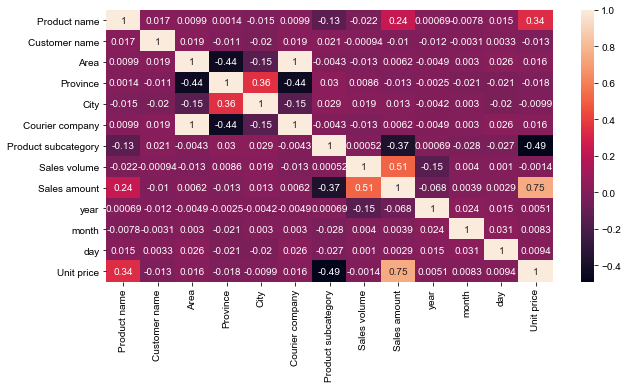

In [86]:
#Multi-Collinearity Check amongst Predictor Variables
plt.figure(figsize = (10,5))
sns.heatmap(data_new.corr(), annot=True)

actually, from this plot, we can see many variables have strong relations with each other.
for example:we can see sales volume and amount have strong relations and it's common sense.

## Part six: Modeling experiments and results

To effectively build the regression model, the categorical predictor variables have to be converted to numeric and 
the train data must be split into 2 parts of 80% and 20% for validation.

### model1- Linear Regression Model(OLS).

In [87]:
product_data1=data_new.groupby('Product name')['Sales volume'].sum().reset_index().sort_values('Sales volume',ascending=False).reset_index(drop=True)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(product_data1[product_data1.columns[0:1]],product_data1[product_data1.columns[1]], test_size=0.2)

In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

y_test.head()

(44, 1)
(44,)
(11, 1)
(11,)


7     4880
53    3210
4     5170
21    4212
10    4705
Name: Sales volume, dtype: int64

Building the Linear Regression Model
Fitting a regular multivariate linear regression model.

In [90]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(X_train, y_train) 
pred = lm.predict(X_test)

In [91]:
# R-squared value of the model
from sklearn.metrics import r2_score
r2_score(y_test, pred)

-0.19002265267273266

In [92]:
import statsmodels.regression.linear_model as sm

In [93]:
X_opt = X_train
ols = sm.OLS(endog = y_train, exog = X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Sales volume   R-squared (uncentered):                   0.677
Model:                            OLS   Adj. R-squared (uncentered):              0.669
Method:                 Least Squares   F-statistic:                              90.06
Date:                Mon, 05 Apr 2021   Prob (F-statistic):                    4.12e-12
Time:                        15:13:51   Log-Likelihood:                         -408.97
No. Observations:                  44   AIC:                                      819.9
Df Residuals:                      43   BIC:                                      821.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Product name   118.8061     12.519      9.490      0.000      93.559     144.053
==============================================================================
Omnibus:                        9.610   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.911
Skew:                           0.922   Prob(JB):                       0.0116
Kurtosis:                       4.209   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#Calculating RMSE

In [95]:
X_opt = X_test
y_pred = ols.predict(X_opt)

In [96]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test, y_pred))

2651.267349012414

In [97]:
import statistics
print(statistics.mean(product_data1['Sales volume']))

4376.672727272728


The RMSE of the  model is calculated to be less than the mean value of sales volume.

### model2- K-means Model(with RFM).

In [98]:
#Read the data file in csv format into Dataframe, load the dataset
#kmeans.csv just modify the "Order_date" name.
data = pd.read_csv('kmeans.csv')

In [99]:
# combine the "customer name" and "area" to customerID
data['CustomerID'] = data['Customer name']+data['Area']
data= data.drop('Customer name', axis = 1) 
data= data.drop('Area', axis = 1) 

In [100]:
#drop the duplicated rows
datauni = data.drop_duplicates()
data.shape[0]-datauni.shape[0]

200

In [101]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
data['CustomerID'] = le1.fit_transform(data['CustomerID'])
le1 = preprocessing.LabelEncoder()

In [102]:
data.loc[:,'Order_date']=pd.to_datetime(data.loc[:,'Order_date'],format='%Y/%m/%d',errors='ignore')

In [103]:
# Intercept the year and month fields
from datetime import datetime
dt=data['Order_date'].astype(str)
dt=dt.apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

In [104]:
data1=data[['CustomerID','Order_date','Sales amount','Sales volume','Order number']]
data1.head()

,CustomerID,Order_date,Sales amount,Sales volume,Order number
0,984,2014-01-01,164.983,37,10022248449
1,1340,2014-01-01,110.400,23,10022249551
2,1310,2014-01-02,152.100,9,10022250936
3,1827,2014-01-02,222.642,6,10022251493
4,49,2014-01-02,96.525,13,10022250854


In [105]:
#build rfm model
rfm = data.pivot_table(index='CustomerID',
                     values = ['Order number','Sales amount','Order_date'], 
                     aggfunc={'Order number':'count','Sales amount':'sum','Order_date':'max'})

# Take the largest transaction date among all users as the standard, 
# and find the time interval of each transaction as R.
rfm['R'] = (rfm.Order_date.max()- rfm.Order_date) / np.timedelta64(1,'D')

# The number of orders for each customer is F, and the total sales is M.
rfm.rename(columns={'Order number':'F','Sales amount':'M'},inplace = True)
rfm = rfm[['R','F','M']]
rfm.head(6)

,R,F,M
CustomerID,,,
0,52.0,2,3876.300
1,157.0,6,1101.270
2,542.0,2,539.220
3,88.0,2,3823.837
4,83.0,4,3577.563
5,105.0,16,9553.384


In [106]:
#statistical data analysis
rfm.describe()

,R,F,M
count,2060.000000,2060.000000,2060.000000
mean,305.253883,4.220388,1953.279146
std,218.000718,3.060499,1958.201832
min,0.000000,1.000000,23.750000
25%,108.000000,2.000000,578.542500
50%,263.000000,4.000000,1322.082000
75%,496.250000,6.000000,2679.799500
max,1408.000000,26.000000,14512.230000


K-means clustering to find valuable users.

Select feature values and sample data
Eigenvalues use R, F, M

In [107]:
#The data requirements of the K-means algorithm:
#(1) Variable values are symmetrically distributed
#(2) Variables are normalized, and the mean and variance are the same

#From the distribution diagram of the three variables R, F, M, 
#it can be seen that the distribution of the variable value does not satisfy the symmetry,
# and the logarithmic transformation can be used to solve it.

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='M', ylabel='Density'>

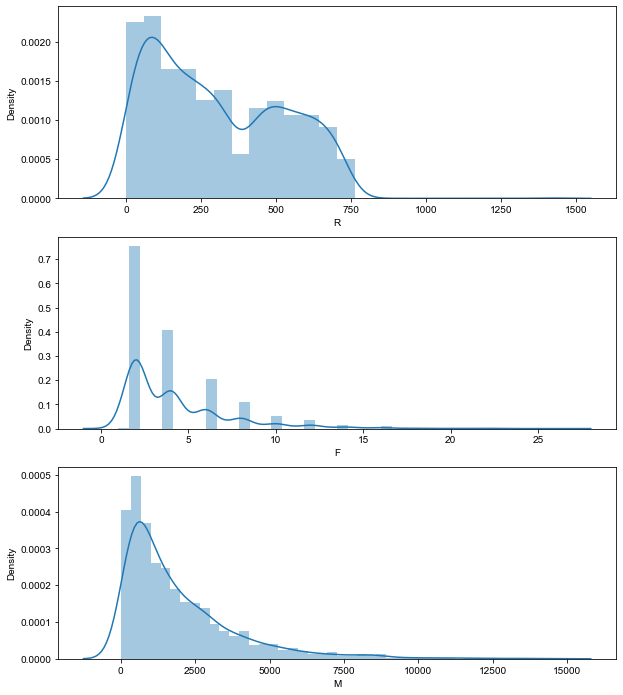

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab
%matplotlib inline
f,ax = plt.subplots(3,1,figsize=(10, 12))
plt.subplot(3,1,1); sns.distplot(rfm['R'],label='R')
plt.subplot(3,1,2); sns.distplot(rfm['F'],label='F')
plt.subplot(3,1,3); sns.distplot(rfm['M'],label='M')

Logarithmic transformation

In [109]:
#(1) Logarithmic transformation
# Replace the value equal to 0 with 1, otherwise there will be infinity after log transformation, 
#and distplot cannot be used.
rfm.R[rfm['R']==0]=0.01
rfm.R[rfm['F']==0]=0.01
rfm.R[rfm['M']==0]=0.01
rfm['R'].describe()
rfm_log = rfm[['R','F','M']].apply(np.log,axis=1).round(3)

<AxesSubplot:xlabel='M', ylabel='Density'>

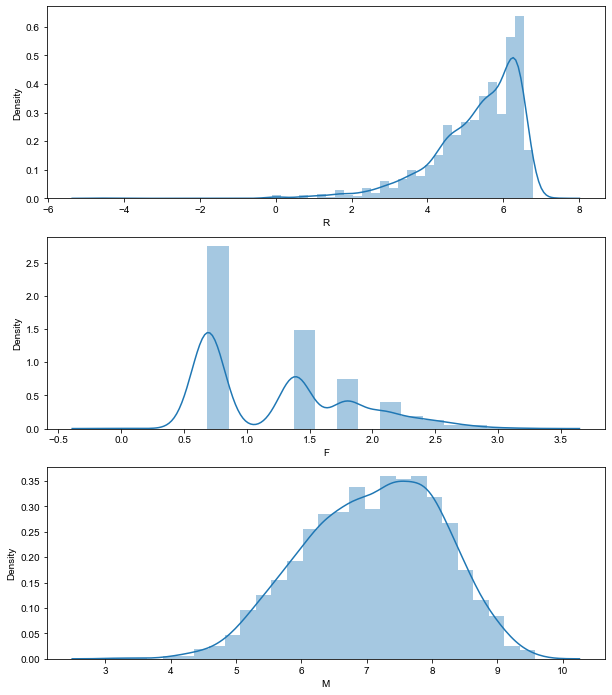

In [110]:
f,ax = plt.subplots(3,1,figsize=(10, 12))
plt.subplot(3,1,1); sns.distplot(rfm_log['R'],label='R')
plt.subplot(3,1,2); sns.distplot(rfm_log['F'],label='F')
plt.subplot(3,1,3); sns.distplot(rfm_log['M'],label='M')

Standardized processing

In [111]:
#fit(): get the preprocessed data, calculate the matrix column mean and column standard deviation
#transform(data): Get a standardized matrix. In this method, fit must be used to preprocess the mean and standard deviation
#Then use the mean and standard deviation calculated by fit to standardize {x_i-u}/standard deviation
#fit_transform(data) is equivalent to a combination of fit and transform

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
rfm_normalization = scaler.transform(rfm_log)

choose the number of clusters

In [113]:
#Here the elbow rule is used for K value selection, and the Calinski-Harabasz Index is used for evaluation

In [114]:
from sklearn.cluster import KMeans
# k值的选择，1~8
ks = range(1,9)
inertias=[]
for k in  ks:
    kc = KMeans(n_clusters=k, init='k-means++', random_state = 1)
    kc.fit(rfm_normalization)
    inertias.append(kc.inertia_) # 样本距离其聚类中心的距离平方和

    print('k=',k,' 迭代次数',kc.n_iter_)

k= 1  迭代次数 2
k= 2  迭代次数 6
k= 3  迭代次数 14
k= 4  迭代次数 15
k= 5  迭代次数 10
k= 6  迭代次数 33
k= 7  迭代次数 50
k= 8  迭代次数 21


In [115]:
# Plot the inertia_ corresponding to each K value

Text(0.5, 1.0, 'Elbow Criterion method to find best k')

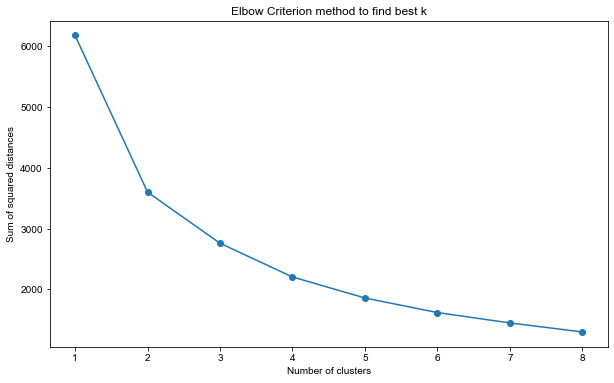

In [116]:
f,ax = subplots(figsize=(10,6))
plt.plot(ks, inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Criterion method to find best k')

According to the elbow rule theorem, it can be seen that when k=2,3, there will be a significant turning point in the decrease of the cost function. Calculate the corresponding value of Calinski-Harabasz Index when K=2 and K=3.

In [117]:
from sklearn import metrics
kk = range(2,9)
for k in kk:
    y_pred = KMeans(n_clusters=k, random_state=1).fit_predict(rfm_normalization) #k must be greater than 1
    calinski = metrics.calinski_harabasz_score(rfm_normalization, y_pred)
    print('k:',k,'   calinski=',calinski)

k: 2    calinski= 1474.6889881157806
k: 3    calinski= 1275.968758102702
k: 4    calinski= 1237.1581900337421
k: 5    calinski= 1196.2360073853424
k: 6    calinski= 1159.742322895985
k: 7    calinski= 1120.1427403063994
k: 8    calinski= 1103.7166081894259


When k=2, calinski_harabaz_scores is the largest, followed by k=3. In terms of business, if the users are divided into two categories, the accuracy is not high enough, so choose k=3 for the next verification

In [118]:
# Model calculation

In [119]:
kc = KMeans(n_clusters=3, random_state=1)
kc.fit(rfm_normalization)
#  每个样本对应的类簇标签，顺序与样本原始顺序一致
cluster_label = kc.labels_
rfm['K-means_label'] = cluster_label
rfm.head(10)

,R,F,M,K-means_label
CustomerID,,,,
0,52.0,2,3876.300,0
1,157.0,6,1101.270,1
2,542.0,2,539.220,2
3,88.0,2,3823.837,0
4,83.0,4,3577.563,1
5,105.0,16,9553.384,1
6,435.0,2,1047.200,2
7,49.0,8,4718.712,1
8,429.0,6,1067.090,1


Features within the group

In [120]:
rfm.groupby(['K-means_label']).agg({'R':'mean','F':'mean','M':['mean','count']})

R         F            M      
                     mean      mean         mean count
K-means_label                                         
0               37.933368  4.000000  1807.148158   285
1              264.047288  7.012517  3608.176452   719
2              405.456439  2.378788   865.945972  1056

#### For the RFM model, the smaller R is, the better, while F and M are the larger the better. Therefore, the category 0 group is the most valuable user group.

###  model3 -arima time series model (whole dimension)

In [121]:
# function used to parse a string representing a time according to a format '%Y-%m'.
def parser(x) :
    return datetime.strptime('2014'+x[2:8], '%Y-%m-%d')

In [122]:
# Generate a series using csv file which contains data of shampoo sales for three years
arima_data1=data.groupby('Order_date')['Sales amount'].sum().reset_index().sort_values('Sales amount',ascending=False).reset_index(drop=True)
arima_data1

,Order_date,Sales amount
0,2014-11-20,21771.778
1,2014-11-25,15059.718
2,2015-02-27,13773.322
3,2014-11-23,13738.004
4,2014-11-02,13245.171
...,...,...
1343,2014-08-08,27.300
1344,2017-12-31,25.542
1345,2017-03-06,12.834
1346,2017-01-19,9.009


In [123]:
arima_data1.head()

,Order_date,Sales amount
0,2014-11-20,21771.778
1,2014-11-25,15059.718
2,2015-02-27,13773.322
3,2014-11-23,13738.004
4,2014-11-02,13245.171


In [124]:
#Data Preprocessing
arima_data1= arima_data1.groupby('Order_date')['Sales amount'].sum().reset_index()
arima_data1 = arima_data1.set_index('Order_date')
arima_data1.head()

,Sales amount
Order_date,
2014-01-01,275.383
2014-01-02,1839.477
2014-01-03,8666.067
2014-01-04,1262.535
2014-01-05,9501.169


In [125]:
#Using monthly average sales data
y = arima_data1['Sales amount'].resample('MS').mean()
y['2017':]

Order_date
2017-01-01    1990.069448
2017-02-01    3058.255500
2017-03-01    2208.534677
2017-04-01    2709.270481
2017-05-01    2953.969452
2017-06-01    2807.041414
2017-07-01    3076.158680
2017-08-01    2295.010677
2017-09-01    2823.614276
2017-10-01    2927.724742
2017-11-01    2993.035778
2017-12-01    2481.252968
Freq: MS, Name: Sales amount, dtype: float64

<AxesSubplot:xlabel='Order_date'>

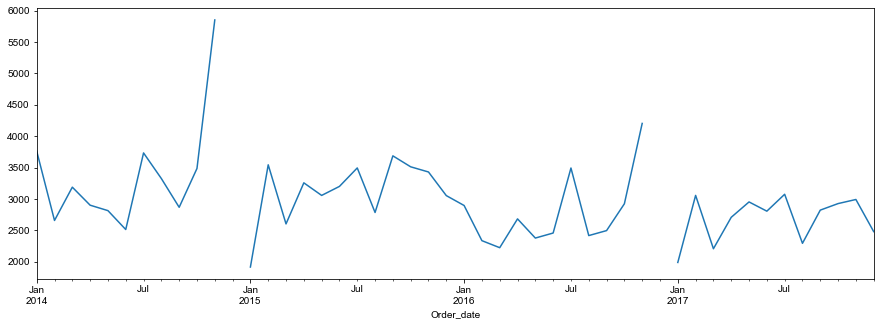

In [126]:
y.plot(figsize = (15, 5))

Seasonal Pattern: Low sales at beginning of year and high sales at the end of year.

Text(0, 0.5, 'Sales amount')

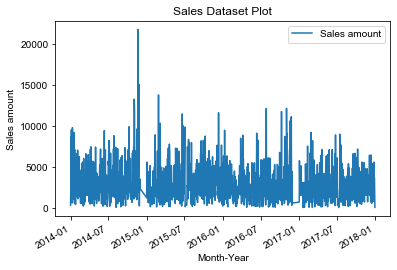

In [127]:
#Plot sales data w.r.t the four years data stored in dataset
arima_data1.plot()
pyplot.title('Sales Dataset Plot')
pyplot.xlabel('Month-Year')
pyplot.ylabel('Sales amount')

Text(0.5, 1.0, 'Autocorrelation Plot of Shampoo Sales Data')

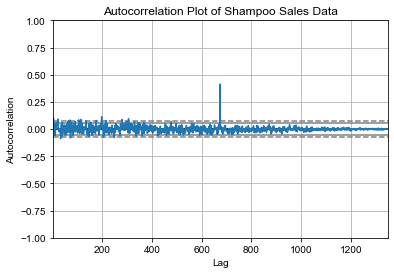

In [128]:
#autocorrelation for a large number of lags in the time series data
autocorrelation_plot(arima_data1)
pyplot.title('Autocorrelation Plot of Shampoo Sales Data')

In [129]:
# fit an ARIMA(5,1,0) model. 
# This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, 
# and uses a moving average model of 0.
model = ARIMA(arima_data1, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Sales amount   No. Observations:                 1347
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12400.791
Method:                       css-mle   S.D. of innovations           2408.924
Date:                Mon, 05 Apr 2021   AIC                          24815.582
Time:                        15:13:56   BIC                          24852.022
Sample:                             1   HQIC                         24829.230
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0156     19.621     -0.052      0.959     -39.472      37.441
ar.L1.D.Sales amount    -0.8052      0.027    -29.700      0.000      -0.858      -0.752
ar.L2.D.Sale

Text(0.5, 1.0, 'ARIMA Fit Residual Error Line Plot')

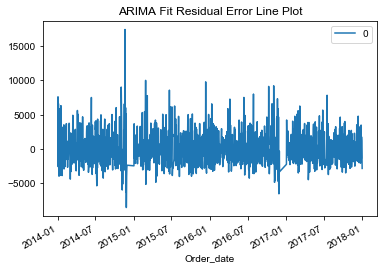

In [130]:
# plot residual errors, shows that there are still some information which is not captured by the model.
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.title('ARIMA Fit Residual Error Line Plot')

Text(0.5, 1.0, 'ARIMA Fit Residual Error Density Plot')

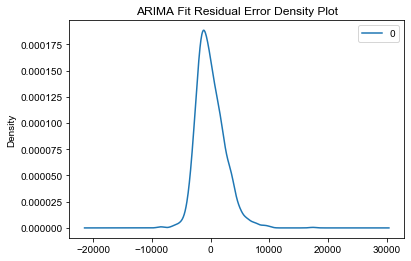

In [131]:
# density plot of the residual error values, shows that the errors are Gaussian, but may not be centered on zero.
residuals.plot(kind='kde')
pyplot.title('ARIMA Fit Residual Error Density Plot')

In [132]:
#Statistical information on the data with the ARIMA model applied
print(residuals.describe())

                  0
count   1347.000000
mean       5.128569
std     2412.321992
min    -8526.100400
25%    -1658.524840
50%     -349.449671
75%     1363.554590
max    17403.245142


In [133]:
# Make predictions using ARIMA model
X = arima_data1.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3173.753849, expected=1508.435000
predicted=2809.600818, expected=1806.499000
predicted=2310.278669, expected=1623.815000
predicted=2113.283508, expected=3057.712000
predicted=2279.671990, expected=9.009000
predicted=1741.983727, expected=1156.586000
predicted=1407.651619, expected=703.248000
predicted=1442.591080, expected=1230.008000
predicted=1216.684977, expected=740.967000
predicted=1052.949867, expected=1677.048000
predicted=964.423334, expected=3085.797000
predicted=1540.685728, expected=2001.775000
predicted=1636.726216, expected=28.704000
predicted=1358.982076, expected=933.520000
predicted=1414.101116, expected=1727.397000
predicted=1631.649927, expected=891.365000
predicted=1313.573485, expected=2383.666000
predicted=1295.457916, expected=5329.698000
predicted=2170.055702, expected=3946.607000
predicted=2699.398473, expected=615.778000
predicted=2351.528170, expected=2754.767000
predicted=2730.365946, expected=667.548000
predicted=2661.036249, expected=2766.658000


predicted=3004.980444, expected=263.340000
predicted=2131.201873, expected=1827.026000
predicted=2279.698882, expected=2158.284000
predicted=2435.458477, expected=3784.094000
predicted=2423.921316, expected=3293.548000
predicted=2321.714222, expected=2041.836000
predicted=2234.768615, expected=2011.104000
predicted=2541.693160, expected=320.661000
predicted=2242.259288, expected=2584.461000
predicted=2279.647398, expected=3480.840000
predicted=2372.436347, expected=244.760000
predicted=1607.488595, expected=1791.410000
predicted=1670.632620, expected=1321.811000
predicted=1809.418742, expected=2404.706000
predicted=1896.955687, expected=1415.017000
predicted=1698.211599, expected=1662.921000
predicted=1483.923841, expected=3842.270000
predicted=2198.071582, expected=1973.692000
predicted=2128.737583, expected=961.956000
predicted=1877.021703, expected=3118.815000
predicted=2307.516952, expected=1721.484000
predicted=2269.054490, expected=1397.956000
predicted=1962.128040, expected=2118

In [134]:
# Calculate MSE on ARIMA model
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 4042010.073


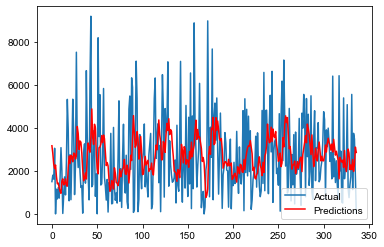

In [135]:
# plot Actual vs predicted sales data
pyplot.plot(test,label='Actual')
pyplot.plot(predictions, color='red', label='Predictions')
pyplot.legend(loc=4)

In [136]:
# we can see from the above plots, the prediction result is not good.

## Part seven: Summary

### This report is mainly to analyze, model, and put forward conclusions on part of the sales data of Tmall flagship stores from 2014 to 1017.

First, browse the data set to understand what the data set does.

Then perform basic cleaning operations on the data set.

Perform data analysis on the four different dimensions of "time", "customer", "product" and "area" on the existing data set.

Next, in order to use the machine model for modeling, feature engineering and corresponding processing of data attributes and dataset.

Use three machine models to model data of different dimensions and draw conclusions.

Finally, make a summary.

### After finishing this report and coding, there are actually many places for further mining of this data, but because this data set does need to be machine learning, there are still many places that need to be processed and learned, and I hope that it can be done after learning. Better results.

In [137]:
##########绘制雷达图###########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plts

#标签
labels = rfm.columns
#每个类别中心点数据
plot_data = kc.labels_
#指定颜色
color = ['b', 'g', 'r', 'c', 'y']
# 设置角度
angles = np.linspace(0, 2*np.pi, k, endpoint=False)
# 闭合
angles = np.concatenate((angles, [angles[0]]))
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, polar=True) # polar参数为True即极坐标系
for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', color = color[i], label = '类别'+str(i), linewidth=2)

# ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei") # 手动配置r网格刻度
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
ax.set_title('聚类类别特征分析')
plt.legend(loc = 4) # 设置图例位置
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed